In [61]:
%matplotlib inline
import seaborn as sn
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score, classification_report, confusion_matrix
import collections
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier as MLP
np.random.seed(1337)  # for reproducibility

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
X_train = np.load('/content/drive/My Drive/EMG_Signal_Classification-master/data/train/X_train.npy') 

Y_train = np.load('/content/drive/My Drive/EMG_Signal_Classification-master/data/train/Y_train.npy')

X_test1 = np.load('/content/drive/My Drive/EMG_Signal_Classification-master/data/test/set1/X_test.npy')

Y_test1 = np.load('/content/drive/My Drive/EMG_Signal_Classification-master/data/test/set1/Y_test.npy')

X_test2 = np.load('/content/drive/My Drive/EMG_Signal_Classification-master/data/test/set2/X_test2.npy')

Y_test2 = np.load('/content/drive/My Drive/EMG_Signal_Classification-master/data/test/set2/Y_test2.npy')

In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test1 = scaler.fit_transform(X_test1)
X_test2 = scaler.fit_transform(X_test2)

In [4]:
print(X_train.shape)
print(Y_train.shape)

print(X_test1.shape)
print(Y_test1.shape)


print(X_test2.shape)
print(Y_test2.shape)

(28368, 42)
(28368,)
(12168, 42)
(12168,)
(7040, 42)
(7040,)


In [5]:
SVM_clf = joblib.load('/content/drive/My Drive/EMG_Signal_Classification-master/models/ET_emg_clf.pkl')

LR_clf = joblib.load('/content/drive/My Drive/EMG_Signal_Classification-master/models/LR_emg_clf.pkl')

RF_clf = joblib.load('/content/drive/My Drive/EMG_Signal_Classification-master/models/RF_emg_clf.pkl')

ET_clf = joblib.load('/content/drive/My Drive/EMG_Signal_Classification-master/models/ET_emg_clf.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [6]:
estimators=[('LR',LR_clf),('SVM',SVM_clf),('RF',RF_clf),('ET',ET_clf)]

In [7]:
X_dev = np.load('/content/drive/My Drive/EMG_Signal_Classification-master/data/dev/X_dev.npy')

Y_dev = np.load('/content/drive/My Drive/EMG_Signal_Classification-master/data/dev/Y_dev.npy')

In [8]:
X_dev = scaler.fit_transform(X_dev)

In [9]:
np.shape(X_dev)

(7040, 42)

In [10]:
# predictions of the dev data using the four models 

In [11]:
#ET

In [12]:
Y_pred_ET = ET_clf.predict(X_dev)

In [13]:
Y_pred_ET

array([6, 1, 3, ..., 2, 2, 7])

In [14]:
accuracy = accuracy_score(Y_pred_ET,Y_dev)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

Accuracy: 96.37784%


In [15]:
#RF

In [16]:
Y_pred_RF = RF_clf.predict(X_dev)

In [17]:
Y_pred_RF

array([6, 1, 3, ..., 2, 2, 7])

In [18]:
accuracy = accuracy_score(Y_pred_RF,Y_dev)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

Accuracy: 95.45455%


In [19]:
#LR

In [20]:
Y_pred_LR = LR_clf.predict(X_dev)

In [21]:
Y_pred_LR

array([6, 1, 3, ..., 2, 2, 7])

In [22]:
accuracy = accuracy_score(Y_pred_LR ,Y_dev)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

Accuracy: 96.71875%


In [23]:
#SVM

In [24]:
Y_pred_SVM = SVM_clf.predict(X_dev)

In [25]:
Y_pred_SVM

array([6, 1, 3, ..., 2, 2, 7])

In [26]:
accuracy = accuracy_score(Y_pred_SVM , Y_dev)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

Accuracy: 96.37784%


In [27]:
#new training set

In [28]:
#arrays = (Y_pred_SVM,Y_pred_LR,Y_pred_RF,Y_pred_ET)

In [29]:

X_Train_New = np.stack((Y_pred_SVM,Y_pred_LR,Y_pred_RF,Y_pred_ET), axis=1)

In [30]:
X_Train_New

array([[6, 6, 6, 6],
       [1, 1, 1, 1],
       [3, 3, 3, 3],
       ...,
       [2, 2, 2, 2],
       [2, 2, 2, 2],
       [7, 7, 7, 7]])

In [31]:
#X_Train_New = scaler.fit_transform(X_Train_New)

In [32]:
#X_Train_New

In [33]:
np.shape(X_Train_New)

(7040, 4)

In [34]:
Y_Train_New = Y_dev

In [35]:
np.shape(Y_Train_New)

(7040,)

In [36]:

### Stacking Classifier 2 ###


In [37]:
# Meta-learner

In [79]:
#the parameters by cross-validation

# measure the quality of a split
criterion = ["gini","entropy"]
# Number of trees in random forest
n_estimators = [100, 500, 1000, 1500, 2000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 40, 80, 100]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


# setting up the parameter grid
tuned_parameters = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
             

print("# Tuning hyper-parameters for Random Forest Classifier")
print()

clf = GridSearchCV(RandomForestClassifier(random_state=0), tuned_parameters, scoring='accuracy', cv = 2)

clf.fit(X_Train_New , Y_Train_New)

print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.4f (+/-%0.04f) for %r"
            % (mean, std * 2, params))
print()

# Tuning hyper-parameters for Random Forest Classifier

Best parameters set found on training set:

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}

Grid scores on training set:

0.9794 (+/-0.0054) for {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9794 (+/-0.0065) for {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.9794 (+/-0.0065) for {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
0.9794 (+/-0.0065) for {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1500}
0.9794 (+/-0.0065) for {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_sampl

## 
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}


In [38]:
#TRAINING DATA(for final model): X_train_ovr: X_train + X_dev, Y_train_ovr=Y_train+Y_dev
X_train_ovr = np.concatenate((X_train,X_dev),0)
Y_train_ovr = np.concatenate((Y_train,Y_dev),0)

In [39]:
#sclf1

In [40]:
RF_meta = RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = 'auto', 
                                 min_samples_leaf = 1, min_samples_split = 5, n_estimators = 1000,random_state=0)

In [41]:
sclf1 = StackingClassifier(estimators, final_estimator= RF_meta, cv= 5 , 
                           stack_method='auto', n_jobs=None, passthrough=False, verbose=0)

In [42]:
sclf1.fit(X_train_ovr , Y_train_ovr)

StackingClassifier(cv=5,
                   estimators=[('LR',
                                LogisticRegression(C=100, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None,
                                                   max_iter=10000,
                                                   multi_class='multinomial',
                                                   n_jobs=-1, penalty='l2',
                                                   random_state=None,
                                                   solver='saga', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('SVM',
                                ExtraTreesClass

In [43]:
Y_Pred_Stack_RF_1 = sclf1.predict(X_test1)
Y_Pred_Stack_RF_2 = sclf1.predict(X_test2)

In [44]:
accuracy = accuracy_score(Y_Pred_Stack_RF_1 , Y_test1)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

Accuracy: 98.45496%


In [45]:
accuracy = accuracy_score(Y_Pred_Stack_RF_2 , Y_test2)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

Accuracy: 99.27557%


In [74]:
def results(X_test, y_test, y_predict, no_of_classes, model):
   #accuracy
   print(accuracy_score(y_test, y_predict))

   #classification report
   from sklearn import metrics
   print(metrics.classification_report(y_test, y_predict, digits = 8))

   from sklearn.metrics import confusion_matrix
    
   #confusion matrix   
   cm_svm = confusion_matrix(y_test, y_predict)
    
   array = cm_svm 
   df_cm = pd.DataFrame(array, index = [i for i in "12345678"],
                  columns = [i for i in "12345678"])
    
   plt.figure(figsize = (10,8))
   sn.heatmap(df_cm, annot=True)
   plt.show()  
    
   #number of correctly classified samples in the test set
   print(accuracy_score(y_test, y_predict, normalize=False))

   #binarise
   y_score = model.predict_proba(X_test)

   y_test_bin = label_binarize(y_test, classes=[*range(no_of_classes)])
    
   precision = dict()
   recall = dict()
   x=range(no_of_classes)
   print(x)
    
   for i in range(no_of_classes):
      precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:,i],y_score[:, i])
      plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

   plt.xlabel("recall")
   plt.ylabel("precision")
   plt.legend(loc="best")
   plt.title("precision vs. recall curve")
   plt.show()

   #roc_curve
   fpr = dict()
   tpr = dict()
   x=range(no_of_classes)
   print(x)
   for i in range(no_of_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i],y_score[:, i])
      plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

   plt.xlabel("false positive rate")
   plt.ylabel("true positive rate")
   plt.legend(loc="best")
   plt.title("ROC curve")
   plt.show()


In [ ]:
               
### Stacking Classifier 2 ###
               

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = {
    'hidden_layer_sizes': [(100,),(32,64,32),(32,16),(64,64)],
    'activation': ['relu','logistic'],
    'max_iter': [1000, 2000],
    'solver': [ 'adam'],
    'alpha': [0.01, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}
                            
            
print("# Tuning hyper-parameters for MLP")
print()

clf = GridSearchCV(MLP(random_state = 0), tuned_parameters, scoring='accuracy', cv = 5)
clf.fit(X_Train_New, Y_Train_New)

print("Best parameters set found on training set:")
print()

print(clf.best_params_)
print()

print("Grid scores on training set:")
print()

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

# Tuning hyper-parameters for MLP

Best parameters set found on training set:

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (64, 64), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}

Grid scores on training set:

0.979 (+/-0.005) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}
0.979 (+/-0.005) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 2000, 'solver': 'adam'}
0.979 (+/-0.005) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'adam'}
0.979 (+/-0.005) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'max_iter': 2000, 'solver': 'adam'}
0.979 (+/-0.003) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (32, 64, 32), 'learning_rate': 'constant', 'max_iter': 100

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (64, 64), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}


In [ ]:
#sclf2

In [46]:
MLP_meta = MLP(hidden_layer_sizes=(64,64), activation='relu', solver='adam', alpha=0.01,
               batch_size='auto', learning_rate='constant', max_iter=1000,  random_state= 0)

In [47]:
sclf2 = StackingClassifier(estimators, final_estimator= MLP_meta,  cv= 5 , stack_method='auto', n_jobs=None, passthrough=False, verbose=0)

In [48]:
sclf2.fit(X_train_ovr , Y_train_ovr)

StackingClassifier(cv=5,
                   estimators=[('LR',
                                LogisticRegression(C=100, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None,
                                                   max_iter=10000,
                                                   multi_class='multinomial',
                                                   n_jobs=-1, penalty='l2',
                                                   random_state=None,
                                                   solver='saga', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('SVM',
                                ExtraTreesClass

In [49]:
Y_Pred_Stack_MLP_1 = sclf2.predict(X_test1)

Y_Pred_Stack_MLP_2 = sclf2.predict(X_test2)

In [50]:
accuracy = accuracy_score(Y_Pred_Stack_MLP_1 , Y_test1)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

Accuracy: 98.29882%


In [51]:
accuracy = accuracy_score(Y_Pred_Stack_MLP_2 , Y_test2)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

Accuracy: 99.21875%


In [ ]:
#---

In [80]:
sclf1a = sclf1

In [81]:
sclf1a.fit(X_train , Y_train)

StackingClassifier(cv=5,
                   estimators=[('LR',
                                LogisticRegression(C=100, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None,
                                                   max_iter=10000,
                                                   multi_class='multinomial',
                                                   n_jobs=-1, penalty='l2',
                                                   random_state=None,
                                                   solver='saga', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('SVM',
                                ExtraTreesClass

In [82]:
Y_Pred_Stack_RF_1a = sclf1a.predict(X_test1)
Y_Pred_Stack_RF_2a = sclf1a.predict(X_test2)

In [83]:
accuracy = accuracy_score(Y_Pred_Stack_RF_1a , Y_test1)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

Accuracy: 91.47765%


In [85]:
accuracy = accuracy_score(Y_Pred_Stack_RF_2a , Y_test2)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

Accuracy: 96.06534%


In [ ]:
#---

In [ ]:
sclf2a = StackingClassifier(estimators, final_estimator= MLP_meta,  cv= 5 , stack_method='auto', n_jobs=None, passthrough=False, verbose=0)

In [ ]:
sclf2a.fit(X_train , Y_train)

StackingClassifier(cv=5,
                   estimators=[('LR',
                                LogisticRegression(C=100, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None,
                                                   max_iter=10000,
                                                   multi_class='multinomial',
                                                   n_jobs=-1, penalty='l2',
                                                   random_state=None,
                                                   solver='saga', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('SVM',
                                ExtraTreesClass

In [ ]:
Y_Pred_Stack_MLP_1a = sclf2a.predict(X_test1)
Y_Pred_Stack_MLP_2a = sclf2a.predict(X_test2)

In [ ]:
accuracy = accuracy_score(Y_Pred_Stack_MLP_1a , Y_test1)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

Accuracy: 91.69954%


In [ ]:
accuracy = accuracy_score(Y_Pred_Stack_MLP_2a , Y_test2)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

Accuracy: 96.61932%


In [ ]:
#---

0.9845496383957922
              precision    recall  f1-score   support

           0  0.99737533 0.99934254 0.99835796      1521
           1  1.00000000 0.99737015 0.99868334      1521
           2  0.99934297 1.00000000 0.99967138      1521
           3  0.99405155 0.98882314 0.99143045      1521
           4  0.99737705 1.00000000 0.99868680      1521
           5  0.94897283 0.94148586 0.94521452      1521
           6  0.93949252 0.94937541 0.94440811      1521
           7  1.00000000 1.00000000 1.00000000      1521

    accuracy                      0.98454964     12168
   macro avg  0.98457653 0.98454964 0.98455657     12168
weighted avg  0.98457653 0.98454964 0.98455657     12168



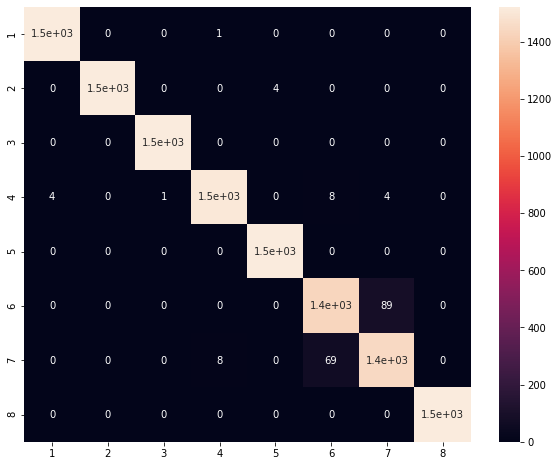

11980
range(0, 8)


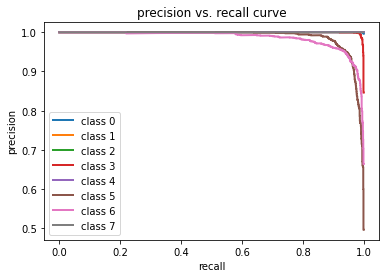

range(0, 8)


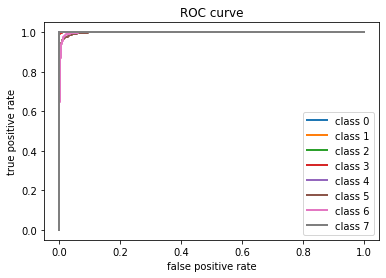

In [75]:
results(X_test1, Y_test1, Y_Pred_Stack_RF_1, 8, sclf1)

0.9927556818181819
              precision    recall  f1-score   support

           0  1.00000000 1.00000000 1.00000000       887
           1  1.00000000 1.00000000 1.00000000       883
           2  1.00000000 0.99772210 0.99885975       878
           3  0.99887260 0.99662542 0.99774775       889
           4  0.99887767 0.99887767 0.99887767       891
           5  0.96196868 0.98510882 0.97340125       873
           6  0.98377752 0.96477273 0.97418244       880
           7  0.99883586 0.99883586 0.99883586       859

    accuracy                      0.99275568      7040
   macro avg  0.99279154 0.99274282 0.99273809      7040
weighted avg  0.99282963 0.99275568 0.99276370      7040



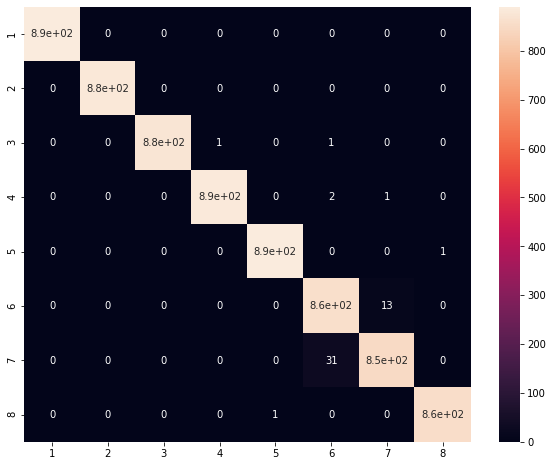

6989
range(0, 8)


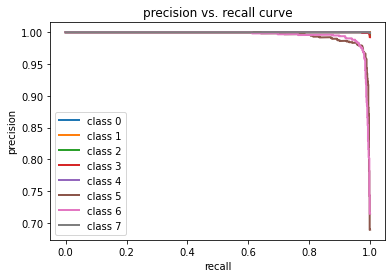

range(0, 8)


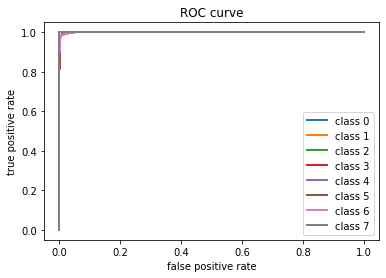

In [76]:
results(X_test2, Y_test2, Y_Pred_Stack_RF_2, 8, sclf1)

0.9829881656804734
              precision    recall  f1-score   support

           0  0.99541585 0.99934254 0.99737533      1521
           1  1.00000000 1.00000000 1.00000000      1521
           2  0.99934297 1.00000000 0.99967138      1521
           3  0.99601329 0.98553583 0.99074686      1521
           4  1.00000000 1.00000000 1.00000000      1521
           5  0.92811297 0.95069034 0.93926600      1521
           6  0.94574682 0.92833662 0.93696085      1521
           7  1.00000000 1.00000000 1.00000000      1521

    accuracy                      0.98298817     12168
   macro avg  0.98307899 0.98298817 0.98300255     12168
weighted avg  0.98307899 0.98298817 0.98300255     12168



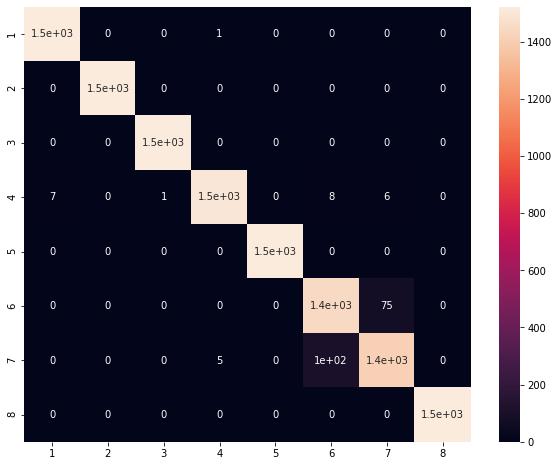

11961
range(0, 8)


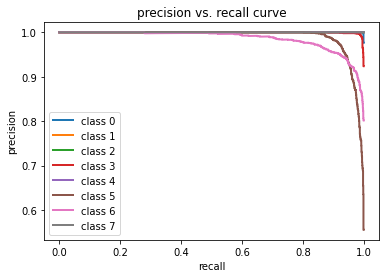

range(0, 8)


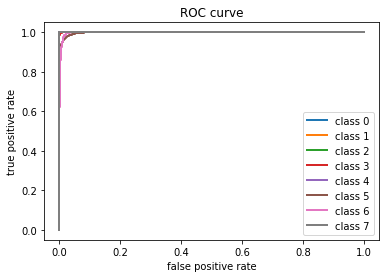

In [77]:
results(X_test1, Y_test1, Y_Pred_Stack_MLP_1, 8, sclf2)

0.9921875
              precision    recall  f1-score   support

           0  1.00000000 1.00000000 1.00000000       887
           1  1.00000000 1.00000000 1.00000000       883
           2  1.00000000 0.99886105 0.99943020       878
           3  0.99775028 0.99775028 0.99775028       889
           4  1.00000000 0.99887767 0.99943852       891
           5  0.95560488 0.98625430 0.97068771       873
           6  0.98593200 0.95568182 0.97057126       880
           7  0.99883721 1.00000000 0.99941827       859

    accuracy                      0.99218750      7040
   macro avg  0.99226555 0.99217814 0.99216203      7040
weighted avg  0.99231028 0.99218750 0.99218932      7040



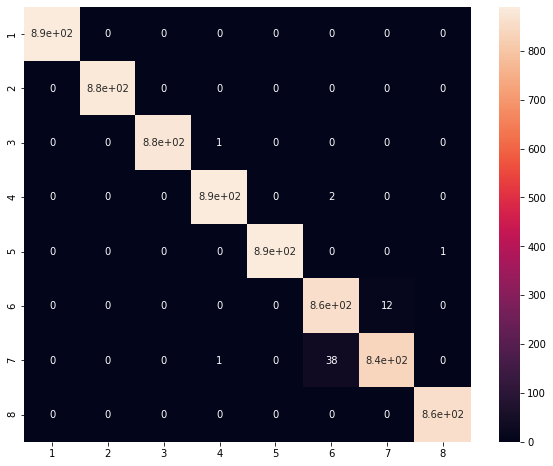

6985
range(0, 8)


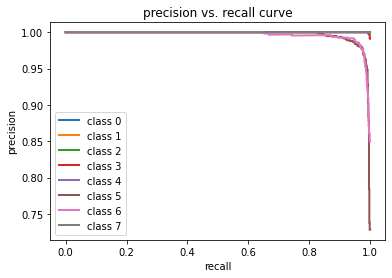

range(0, 8)


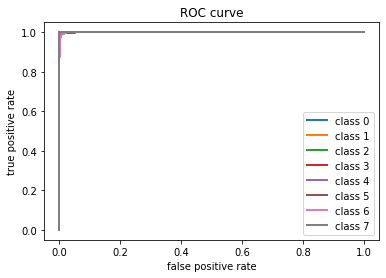

In [78]:
results(X_test2, Y_test2, Y_Pred_Stack_MLP_2, 8, sclf2)